In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from cycler import cycler
import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
import ctypes
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])

import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on

Welcome to JupyROOT 6.26/00


In [2]:
diagnostics_df=pd.read_csv("./diagnostics.csv",index_col=0)
sigma_df=pd.read_csv('./sigma.csv',index_col=0)

In [21]:
diagnostics_df

,ebin00costbin00,ebin00costbin01,ebin00costbin02,ebin00costbin03,ebin00costbin04,ebin00costbin05,ebin00costbin06,ebin00costbin07,ebin00costbin08,ebin00costbin09,...,ebin10costbin02,ebin10costbin03,ebin10costbin04,ebin10costbin05,ebin10costbin06,ebin10costbin07,ebin10costbin08,ebin10costbin09,ebin10costbin10,ebin10costbin11
sigma_median,0.084000,-0.034000,0.27000,0.130000,0.390000,0.740000,0.780000,0.770000,0.670000,0.66000,...,0.470000,0.120000,-0.087000,0.004200,0.200000,0.560000,0.680000,0.860000,0.850000,0.49000
mcse,0.004091,0.004307,0.00399,0.002746,0.003022,0.003004,0.002236,0.002779,0.002528,0.00264,...,0.001677,0.001583,0.001731,0.001573,0.001359,0.001526,0.001582,0.001373,0.001132,0.00113
rhat,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
pval00,0.611050,0.873550,0.00150,0.830550,0.938300,0.262450,0.346350,0.349050,0.210950,0.69535,...,0.774800,0.174450,0.532350,0.356800,0.033150,0.366150,0.982300,0.424950,0.792500,0.51355
pval01,0.853450,0.791750,0.38080,0.459800,0.748400,0.700500,0.527200,0.574900,0.961800,0.28280,...,0.610650,0.796150,0.671500,0.387650,0.276400,0.479350,0.328100,0.978750,0.605450,0.28435
pval02,0.569550,0.330600,0.78530,0.067700,0.486350,0.302250,0.444500,0.400200,0.113400,0.35605,...,0.124200,0.692700,0.673200,0.813950,0.872900,0.246300,0.537750,0.114250,0.538500,0.84770
pval03,0.705100,0.457900,0.03215,0.578750,0.575700,0.238850,0.726050,0.058700,0.605600,0.72780,...,0.588400,0.634150,0.829150,0.463400,0.347900,0.809950,0.476300,0.914850,0.135750,0.41535
pval04,0.960500,0.920850,0.69990,0.938350,0.727150,0.416100,0.809700,0.214850,0.739850,0.32410,...,0.389450,0.045850,0.262100,0.073850,0.691450,0.270500,0.218900,0.781750,0.691600,0.12710
pval05,0.733000,0.201050,0.54175,0.965500,0.067850,0.767800,0.489700,0.267950,0.811550,0.04110,...,0.064850,0.179250,0.240100,0.319450,0.907350,0.857950,0.780150,0.361950,0.846750,0.76895
pval06,0.327050,0.844150,0.96970,0.335800,0.197150,0.612750,0.951250,0.175600,0.779300,0.21240,...,0.684850,0.383200,0.793500,0.626250,0.807500,0.102450,0.177400,0.318250,0.623650,0.24995


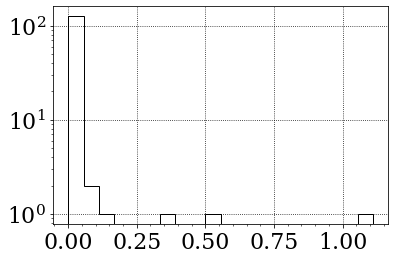

In [6]:
plt.hist(np.abs(np.array(diagnostics_df.loc['mcse'].values)/np.array(diagnostics_df.loc['sigma_median'].values)),histtype='step',bins=20,log=True)
plt.show()

In [7]:
rel_err=np.abs(np.array(diagnostics_df.loc['mcse'].values)/np.array(diagnostics_df.loc['sigma_median'].values))
len(rel_err[rel_err<=0.05])/len(rel_err)

0.9545454545454546

In [14]:
index=np.where(rel_err>=0.05)

In [15]:
index

(array([  1,  12,  49, 111, 113, 125]),)

In [16]:
np.array(diagnostics_df.loc['sigma_median'].values)[index]

array([-0.034 ,  0.04  , -0.0019, -0.026 , -0.0028,  0.0042])

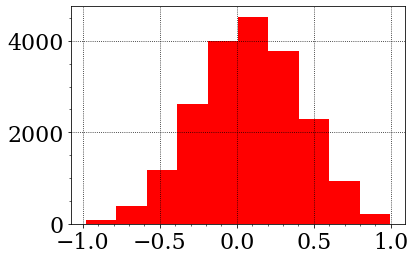

In [20]:
plt.hist(sigma_df["ebin00costbin00"])
plt.show()